## Ch08 绘图和可视化

绘图是数据分析工作中最重要的任务之一，是探索过程的一部分。

### matplotlib API入门

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.random import randn

In [2]:
%matplotlib inline

 ipython --pylab
 In [1]: import numpy as np                    
 In [2]: plot(np.arange(10)) 
 Out[2]: [<matplotlib.lines.Line2D at 0x7fcb355c0208>]

#### FIgure和Subplot

In [3]:
#ipython --pylab
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [4]:
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

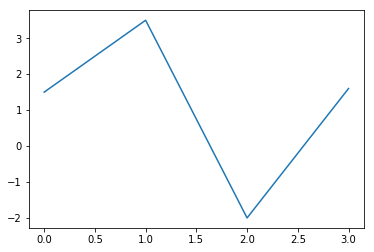

In [5]:
plt.plot([1.5,3.5,-2,1.6])

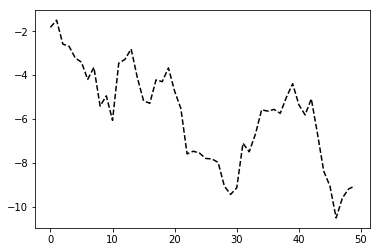

In [6]:
plt.plot(randn(50).cumsum(), 'k--')

In [7]:
_ = ax1.hist(randn(100), bins=20, color='k',alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30)+3*randn(30))

In [8]:
plt.close('all')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00bacbe278>,
      dtype=object)

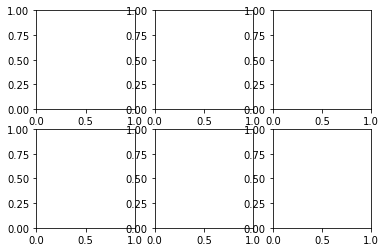

In [9]:
fig, axes = plt.subplots(2,3)
axes

**pyplot.subplots的选项**
- nrows
- ncols
- sharex
- sharey
- subplot_kw
- **fig_kw

#### 调整subplot周围的间距

In [10]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

<Figure size 432x288 with 0 Axes>

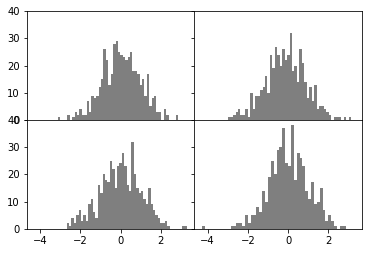

In [11]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

#### 颜色、标记和线形

ax.plot(x,y,'g--')
ax.plot(x,y,linestyle='--', color='g')

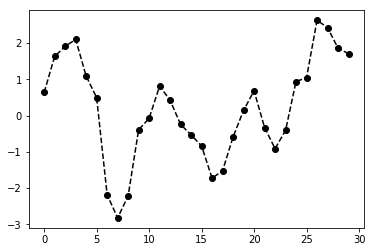

In [12]:
plt.plot(randn(30).cumsum(),'ko--')  

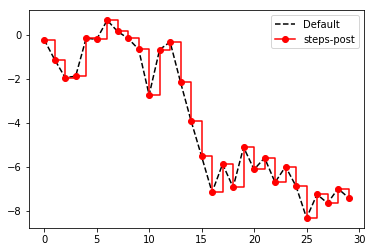

In [13]:
data = randn(30).cumsum()
plt.plot(data,'k--', label='Default')
plt.plot(data,
         linestyle = '-', 
         color='r', 
         marker='o',
         drawstyle='steps-post',
         label= 'steps-post'
        )
plt.legend(loc='best')

#### 刻度、标签和图例

    pyplot接口的设计目的就是交互使用，含有诸如xlim,xticks,xticklabels
    
    - plt.xlim 图表的范围
    - plt.xticks 刻度位置
    - plt.xticklabel 刻度标签
    所有的上面方法都是对当前或者最近创建的AxesSubplot起作用的。例如：
    - plt.xlim对应于ax.get_xlim,ax.set_xlim
    

##### 设置标题、轴标签、刻度以及刻度标签

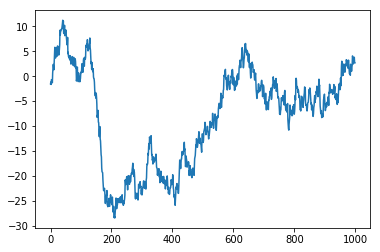

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())

**要修改X轴的刻度，最简单的办法是使用** 
- set_xticks
- set_xticklabels

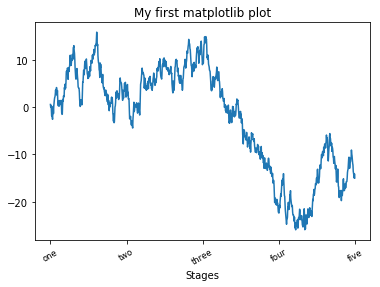

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ticks = ax.set_xticks([0,250,500,750,1000])
label = ax.set_xticklabels(['one', 'two','three','four','five'],
                           rotation=30,fontsize='small'
                          )
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

ax.plot(randn(1000).cumsum())

##### 添加图例

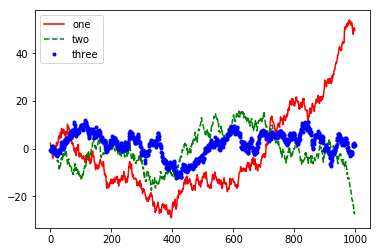

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(randn(1000).cumsum(),
        'k',
        label='one',
        color='r'
       )
ax.plot(randn(1000).cumsum(),
        'k--',
        label='two',
        color='g'
       )
ax.plot(randn(1000).cumsum(),
        'k.',
        label='three',
        color='b'
       )

ax.legend(loc='best')

#### 注解以及在Subplot上面绘图
    绘制一些自定义的注解（文本、箭头或者其他的图形）
- text
- arrow
- annotate

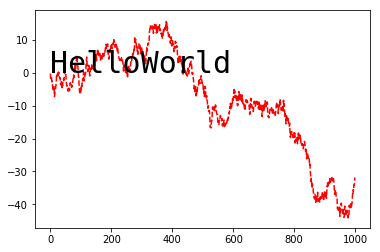

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=0
y=0
ax.text(x,y, 'HelloWorld',
        family='monospace',
        fontsize=30
       )

ax.plot(randn(1000).cumsum(),
        'k--',
        label='one',
        color='r'
       )

Text(0.5, 1.0, 'Important dates in 2008-2009 financial crisis')

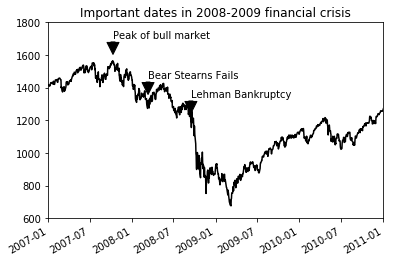

In [18]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('../pydata/ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

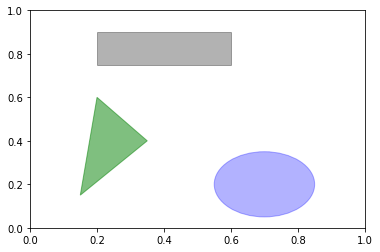

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

#### 将图表保存到文件

In [20]:
plt.savefig('figpath.svg')
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [21]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 432x288 with 0 Axes>

**Figure.saving的选项**
- fname
- dpi
- facecolor,edgecolor
- format
- bbox_inches

#### matplotlib配置
    自带的配色方案
- 图像大小
- subplot边距
- 配色方案
- 字体大小
- 网格类型

    配置方式有两种：
- plt.rc()函数
- .matplotlibrc配置脚本

In [22]:
plt.rc('figure', figsize=(10, 10))

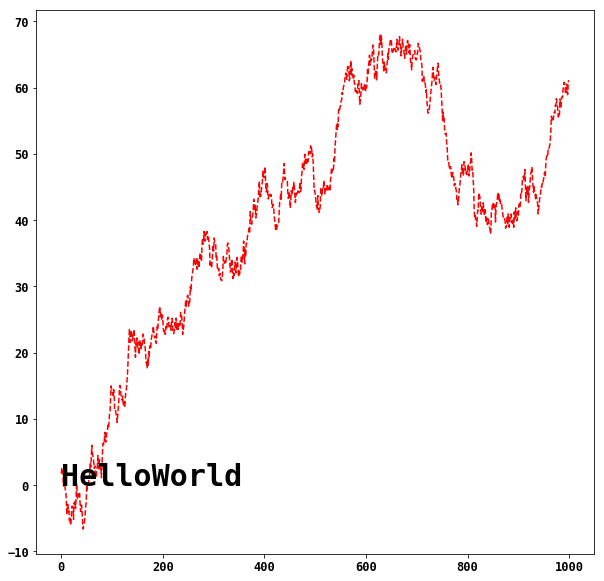

In [23]:
font_options = {
    'family' : 'monospace',
    'weight' : 'bold',
    'size'   : 12
}

plt.rc('font', **font_options)

## Test it as bellow
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=0
y=0
ax.text(x,y, 'HelloWorld',
        family='monospace',
        fontsize=30
       )

ax.plot(randn(1000).cumsum(),
        'k--',
        label='one',
        color='r'
       )

### pandas中的绘图函数
    虽然matplotlib能够画图，但是需要创建很多的对象来控制。比如：
    
- 数据展示（图表类型）
    - 线型图
    - 柱状图
    - 盒状图
    - 散布图
    - 等值线图
- 图例
- 标题
- 刻度标签
- 注解

    上面的功能可以在pandas中简单实现

#### 线型图
    Series和DataFrame都有一个用于生成各类图表的plot方法。默认是线型图

In [24]:
from pandas import Series, DataFrame

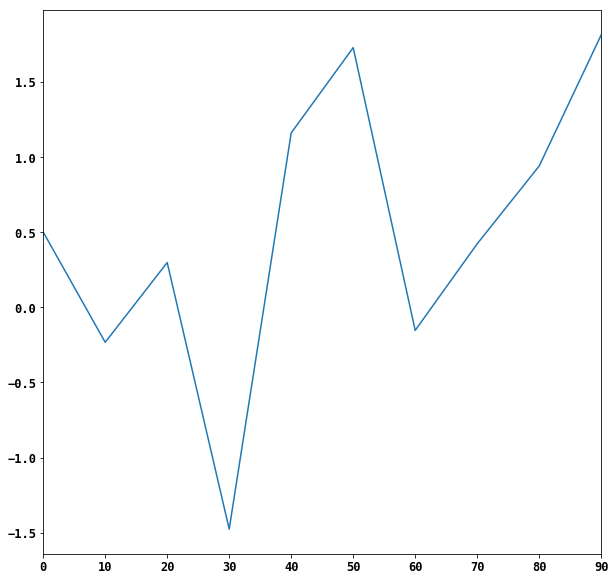

In [25]:
s =Series(randn(10).cumsum(),
          index=np.arange(0,100,10)
         )
s.plot()

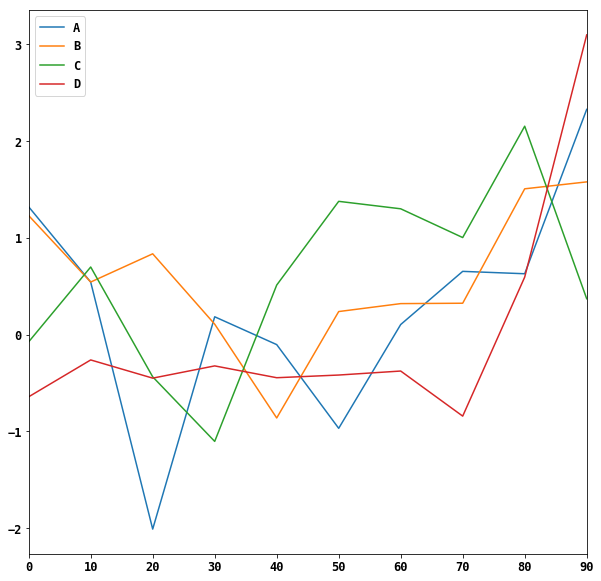

In [26]:
df = DataFrame( randn(10,4).cumsum(0),
               columns=['A','B','C','D'],
               index=np.arange(0,100,10)
              )
df.plot()

    Series.plot方法的参数

- label 用于图例的标签
- ax  要在其上绘制的matplotlib subplot对象
- style 如： 'ko--'
- alpha 不透明度，0-1之间
- kind line,bar,barh,kde
- logy 在Y轴上使用对数标尺
- use_index 将对象的索引用作刻度标签
- rot 刻度标签的旋转度（0-360之间）
- xticks X轴刻度
- yticks Y轴刻度
- xlim X轴界限
- ylim Y轴界限
- grip 显示轴网格线（默认打开）

    专用于DataFrame的plot的选项
- subplot
- sharex
- sharey
- figsize
- title
- legend
- sort_columns

#### 柱状图

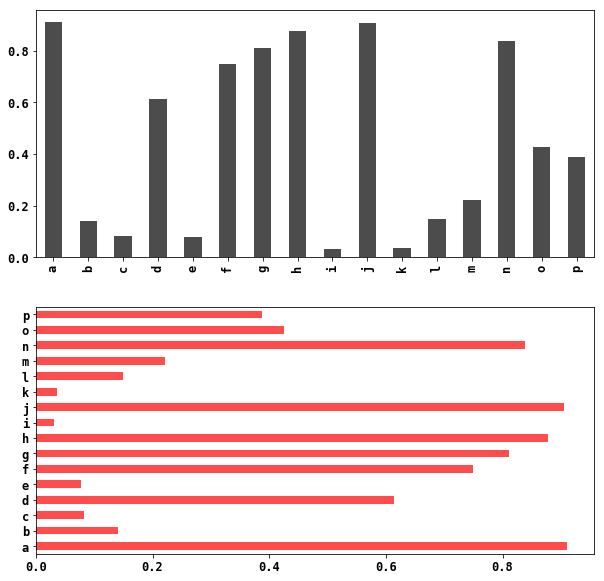

In [27]:
fig, axes = plt.subplots(2,1)
data = Series(np.random.rand(16), 
              index=list('abcdefghijklmnop')
             )
data.plot(kind='bar', 
          ax=axes[0], 
          color='k',
          alpha=0.7)
data.plot(kind='barh', 
          ax=axes[1],
          color='r',
          alpha=0.7
         )

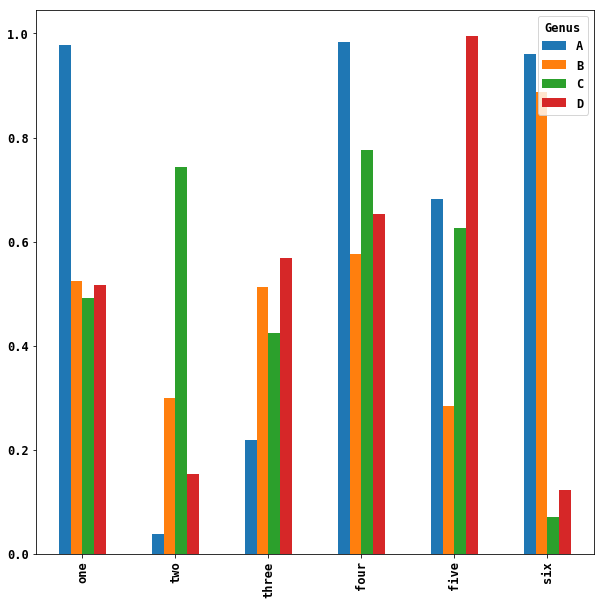

In [28]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot(kind='bar')

In [29]:
plt.figure()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

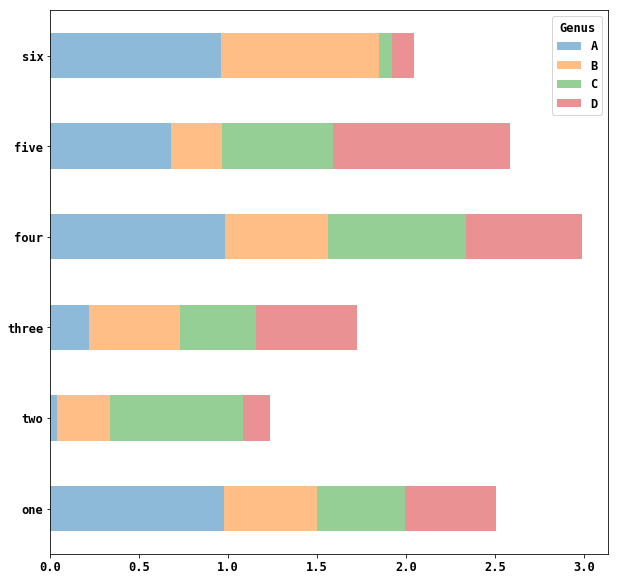

In [30]:
df.plot(kind='barh', stacked=True, alpha=0.5)

In [31]:
tips = pd.read_csv('../pydata/ch08/tips.csv')

party_counts = pd.crosstab(tips.day, tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [32]:
party_counts = party_counts.loc[:,2:5]

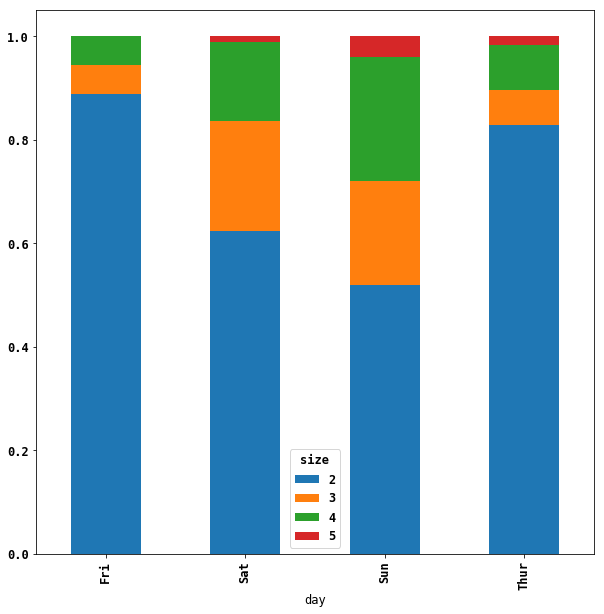

In [33]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

party_pcts.plot(kind='bar', stacked=True)

#### 直方图和密度图
    直方图（histogram）是一种对值频率进行离散化显示的柱状图

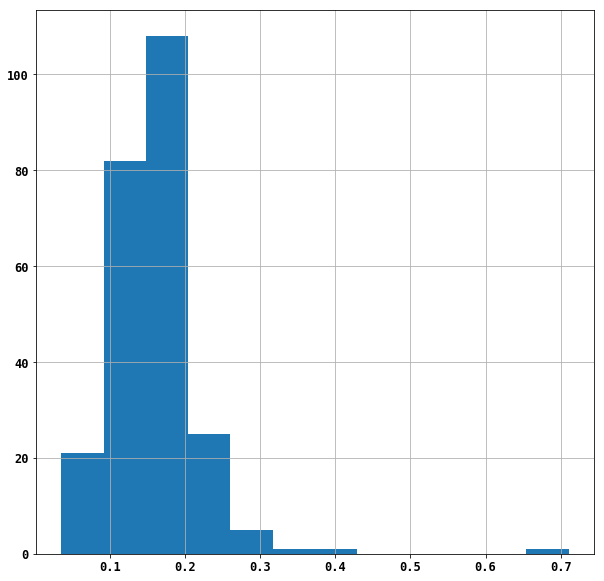

In [34]:
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips['tip_pct'].hist(bins=12)

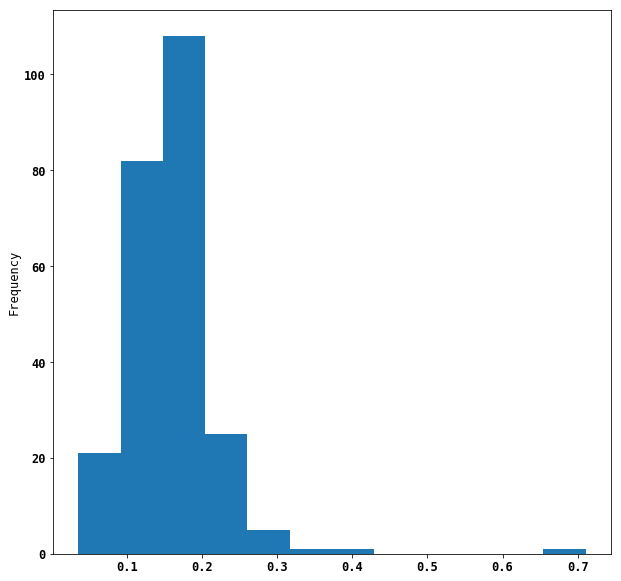

In [35]:
tips['tip_pct'].plot(kind='hist', bins=12)

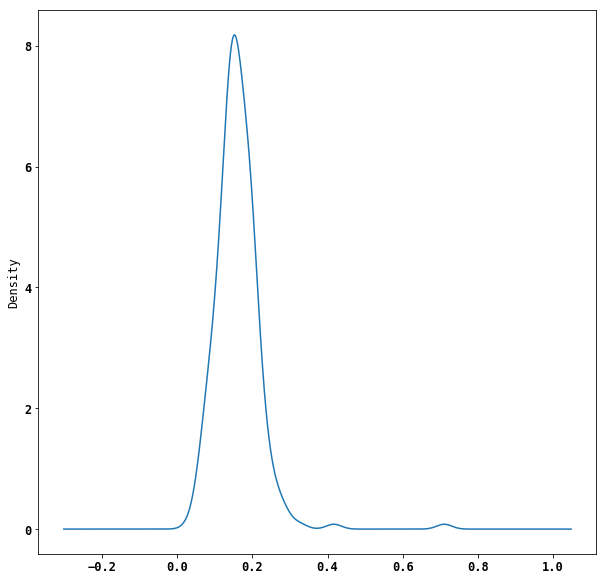

In [36]:
tips['tip_pct'].plot(kind='kde')

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


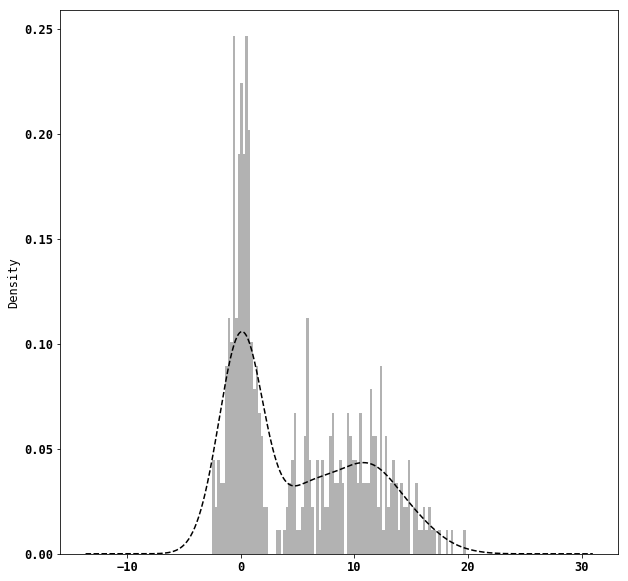

In [37]:
comp1 = np.random.normal(0,1,size=200) #N(0,1)
comp2 = np.random.normal(10,4,size=200) #N(10,4)
values = Series(np.concatenate([comp1,comp2]))
values.plot(kind='hist',
            bins=100,
            alpha=0.3,
            color='k',
            normed=True
           )
values.plot(kind='kde',
            style='k--'
           )


#### 散布图
    散布图(Scatter plot)是观察两个一维数据之间关系的有效手段

In [38]:
macro= pd.read_csv('../pydata/ch08/macrodata.csv')
data = macro[['cpi','m1','tbilrate','unemp']]

In [39]:
trans_data= np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 vs. log unemp')

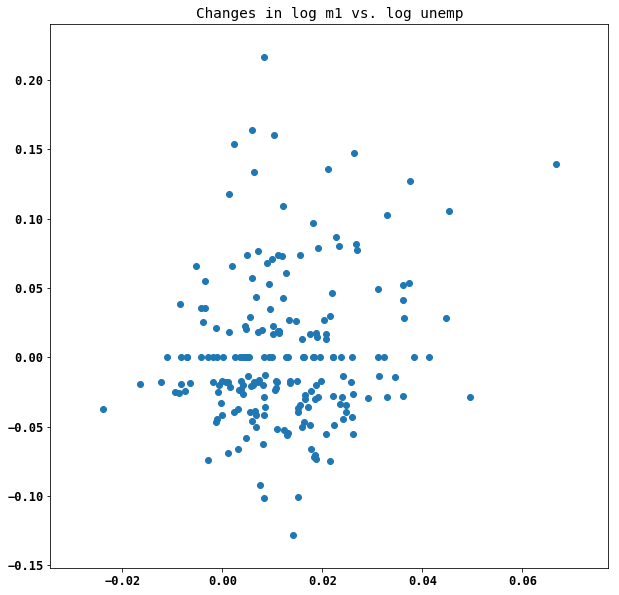

In [40]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' %('m1', 'unemp'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f009fde3e10>,
      dtype=object)

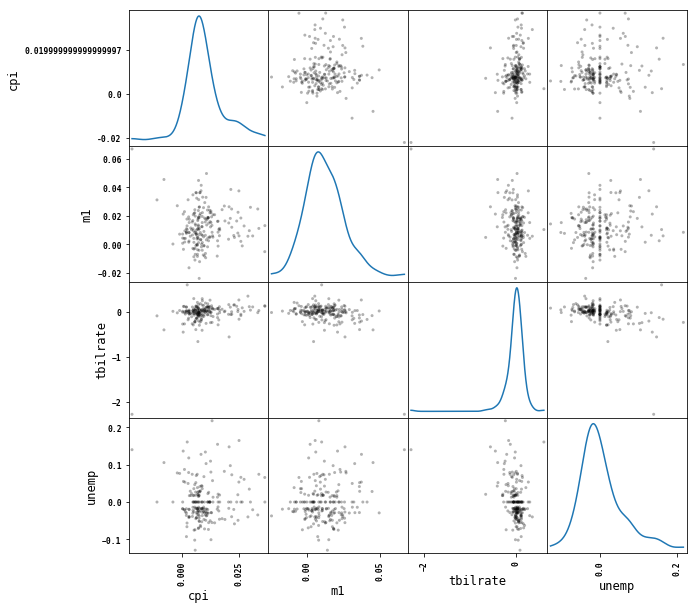

In [41]:
pd.plotting.scatter_matrix(trans_data, diagonal='kde', 
                  color='k', alpha=0.3)

### 绘制地图： 图形化显示海地地震危机数据

In [42]:
data = pd.read_csv('../pydata/ch08/Haiti.csv')
data

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO


In [43]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


### Python图形化工具生态系统

In [44]:
data['CATEGORY'].head(6)

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [45]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [46]:
data = data[
    (  data.LATITUDE > 18 )
    &( data.LATITUDE < 20 )
    & (data.LONGITUDE>-75 )
    & (data.LONGITUDE<-70 )
    & data.CATEGORY.notnull()
]
data.head(5)

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO


In [47]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set( to_cat_list(x)) for x in cat_series)
    '''
    cat_sets = set()
    for x in cat_series:
        s=set(to_cat_list(x))
        cat_sets.add(s)
'''       
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split('|')[1]
    return code, names.strip()

In [48]:
get_english('2. Urgences logistiques| Vital Lines')

('2', 'Vital Lines')

In [49]:
all_cats = get_all_categories(data.CATEGORY)

In [50]:
english_mapping = dict(get_english(x) for x in all_cats)

In [51]:
english_mapping['2a']

'Food Shortage'

In [52]:
english_mapping['6c']

'Earthquake and aftershocks'

In [53]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)

In [54]:
dummy_frame.iloc[:, :6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 6 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
dtypes: float64(6)
memory usage: 195.2 KB


In [55]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1

data = data.join(dummy_frame.add_prefix('category_'))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
data.ix[:, 10:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 5 columns):
category_1     3569 non-null float64
category_1a    3569 non-null float64
category_1b    3569 non-null float64
category_1c    3569 non-null float64
category_1d    3569 non-null float64
dtypes: float64(5)
memory usage: 327.3 KB


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


**How to install BaseMap**
    
``` bash
#install proj
sudo apt-get install proj-bin


#install basemap
git clone  https://github.com/matplotlib/basemap.git

cd basemap/geos-3.3.3
./configure
make -j8
sudo make install 

cd ..
sudo python setup.py install 

sudo ln -sf /usr/local/lib/python3.5/dist-packages/basemap-1.2.1-py3.5-linux-x86_64.egg/mpl_toolkits/basemap/  /usr/local/lib/python3.5/dist-packages/mpl_toolkits/basemap
```

In [57]:
# https://github.com/matplotlib/basemap/releases

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25,
                    lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

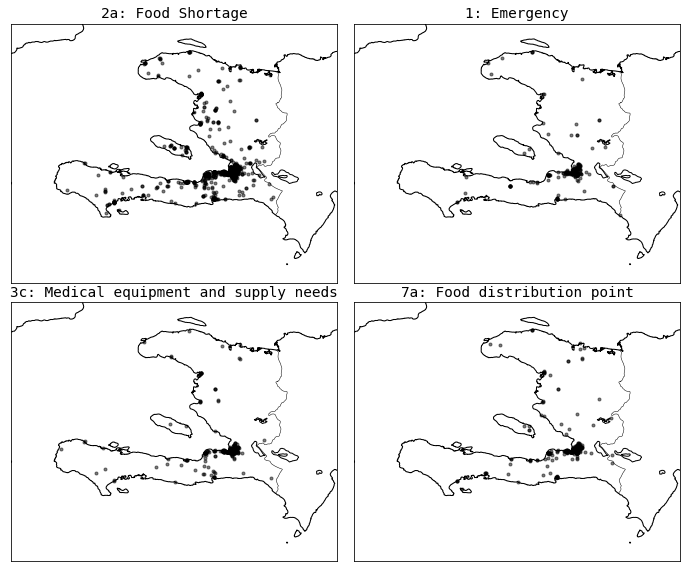

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

    cat_data = data[data['category_%s' % code] == 1]

    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

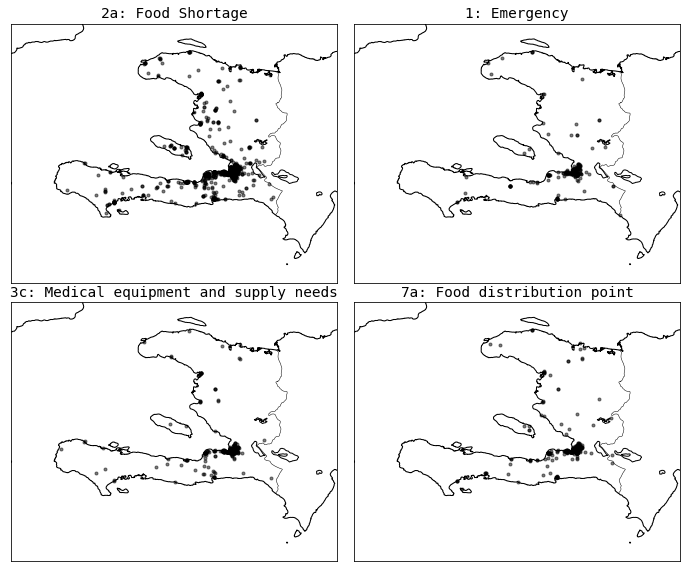

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

def make_plot():

    for i, code in enumerate(to_plot):
        cat_data = data[data['category_%s' % code] == 1]
        lons, lats = cat_data.LONGITUDE, cat_data.LATITUDE

        ax = axes.flat[i]
        m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                            lllon=lllon, urlon=urlon)

        # compute map proj coordinates.
        x, y = m(lons.values, lats.values)

        m.plot(x, y, 'k.', alpha=0.5)
        ax.set_title('%s: %s' % (code, english_mapping[code]))
        
make_plot()

In [61]:
shapefile_path = '../pydata/ch08/PortAuPrince_Roads/PortAuPrince_Roads'
m.readshapefile(shapefile_path, 'roads')

(1583,
 3,
 [-72.749246, 18.409952, 0.0, 0.0],
 [-71.973789, 18.7147105, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x7f00bcfdba58>)

In [63]:
#程序输入是4个经度纬度参数，表示绘制范围，默认的纬度范围是17.25到20.25度，经度范围是-75到-71度。
def basic_map_plot(ax=None, lllat=17.25, urlat=20.25,
                    lllon=-75, urlon=-71):
    # 创建极球面投影的Basemap实例，projection='stere'表示地图类型是极球面，lon_0和lat_0表示地图中心点.
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')

    m.drawcoastlines() #绘制海岸线
    m.drawstates() #绘制州界
    m.drawcountries() #绘制国界
    return m

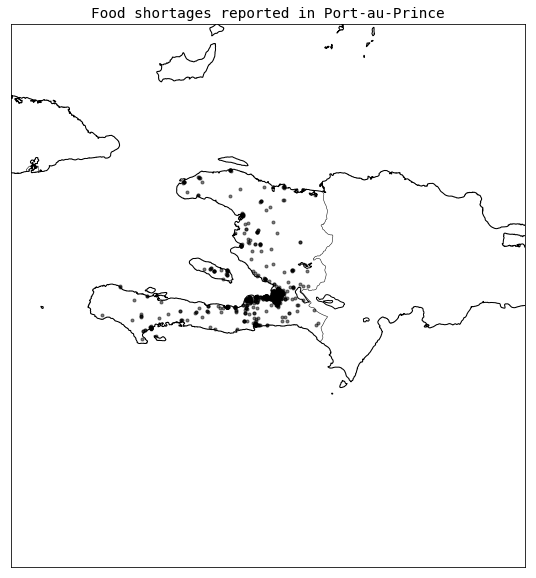

In [66]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)


#下面根据中心点的维度和扩展范围计算4个边界参数
lat0 = 18.533333;lon0 = -72.333333;change = 3;
lllat=lat0-change; urlat=lat0+change; lllon=lon0-change; urlon=lon0+change;

#调用basic_map_plot函数绘制基本地图，包括海岸线，国界等。
m = basic_map_plot(ax, lllat=lllat, urlat=urlat,lllon=lllon, urlon=urlon)

#下面两行获得下一步要绘制的点的坐标（以经度和纬度表示）数据，不必深究，只知道cat_data是个DataFrame对象
code = '2a'
cat_data = data[data['category_%s' % code] == 1]

# 将初始经纬度数据（cat_data.LONGITUDE.values, cat_data.LATITUDE.values）计算经过极球面映射后的坐标.
x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

#添加数据
m.plot(x, y, 'k.', alpha=0.5)
ax.set_title('Food shortages reported in Port-au-Prince')
plt.savefig('myfig.png',dpi=400,bbox_inches='tight')

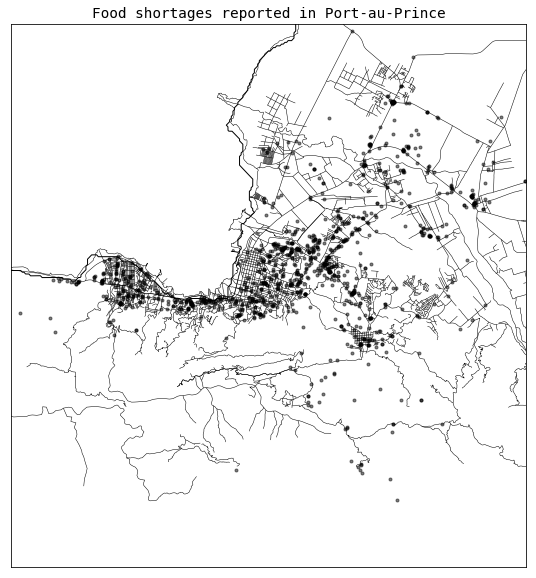

In [67]:
#街道数据的路径
shapefilepath = '../pydata/ch08/PortAuPrince_Roads/PortAuPrince_Roads'

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

lat0 = 18.533333;lon0 = -72.333333;change = 0.13;
lllat=lat0-change; urlat=lat0+change; lllon=lon0-change; urlon=lon0+change;

m = basic_map_plot(ax, lllat=lllat, urlat=urlat,lllon=lllon, urlon=urlon)

m.readshapefile(shapefilepath,'roads') #添加街道数据

code = '2a'
cat_data = data[data['category_%s' % code] == 1]

# compute map proj coordinates.
x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

m.plot(x, y, 'k.', alpha=0.5)
ax.set_title('Food shortages reported in Port-au-Prince')
plt.savefig('myfig.png',dpi=400,bbox_inches='tight')

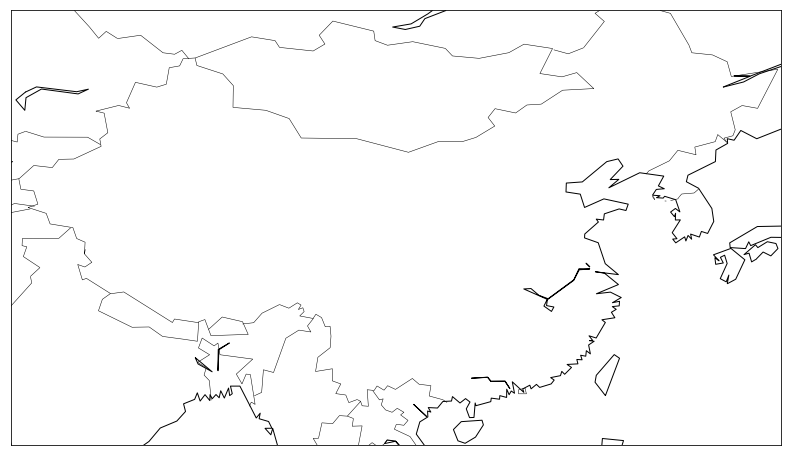

In [73]:

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(16,8))
#m = Basemap()
m= Basemap(llcrnrlon=73, llcrnrlat=18, urcrnrlon=135, urcrnrlat=53)
m.drawcoastlines()
m.drawcountries()
plt.show()

https://blog.csdn.net/ouening/article/details/55227364
- 各省份轮廓图
- 地形图
- 人口分布图

41.282242


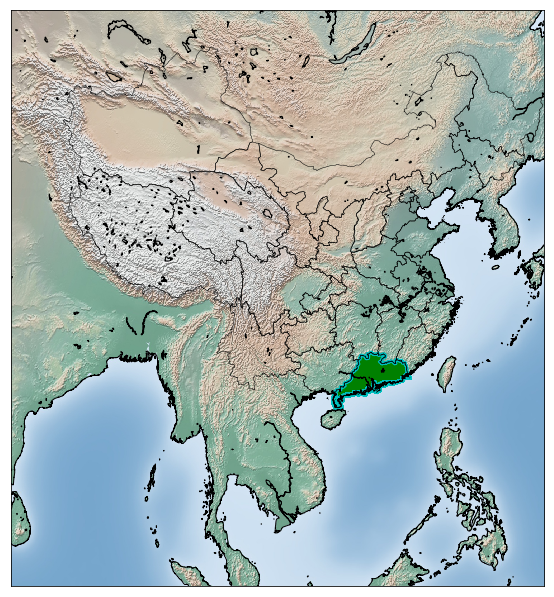

In [76]:
import time

start = time.clock()

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])

map = Basemap(llcrnrlon=80.33, 
              llcrnrlat=3.01, 
              urcrnrlon=138.16, 
              urcrnrlat=56.123,
             resolution='h', projection='cass', lat_0 = 42.5,lon_0=120,ax=ax1)

shp_info = map.readshapefile('/opt/Work/ML/python-code-basemap-example/resources/CHN_adm_shp/CHN_adm1',
                             'states',drawbounds=True) # CHN_adm1的数据是中国各省区域

for info, shp in zip(map.states_info, map.states):
    proid = info['NAME_1']  # 可以用notepad打开CHN_adm1.csv文件，可以知道'NAME_1'代表各省的名称
    if proid == 'Guangdong':
        poly = Polygon(shp,facecolor='g',edgecolor='c', lw=3) # 绘制广东省区域
        ax1.add_patch(poly)

map.shadedrelief() # 绘制阴暗的浮雕图

map.drawcoastlines()
end=time.clock()
print(end-start)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


40.81708400000002


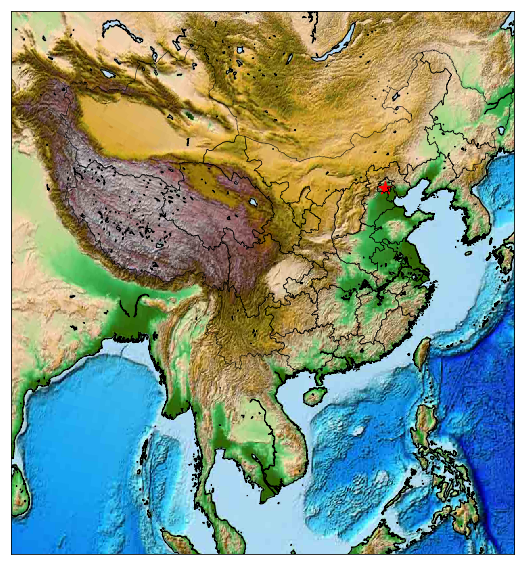

In [80]:
import time

start = time.clock()
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import pandas as pd
import numpy as np
posi=pd.read_excel("/opt/Work/ML/python-code-basemap-example/resources/Basemap/2015Cities-CHINA.xlsx") #读取中国城市数据
lat = np.array(posi["lat"][0:120])                        # 获取维度之维度值
lon = np.array(posi["lon"][0:120])                        # 获取经度值
pop = np.array(posi["pop"][0:120],dtype=float) 
size=(pop/np.max(pop))*100  


map = Basemap(llcrnrlon=80.33, 
              llcrnrlat=3.01, 
              urcrnrlon=138.16, 
              urcrnrlat=56.123,
             resolution='h', projection='cass', lat_0 = 42.5,lon_0=120)

map.readshapefile("/opt/Work/ML/python-code-basemap-example/resources/CHN_adm_shp/CHN_adm1",'states',drawbounds=True)

map.etopo() # 绘制地形图，浮雕样式

map.drawcoastlines()

x,y = map(lon[2],lat[2]) # 北京市坐标，经纬度坐标转换为该map的坐标

a,b = map(lon,lat)

# map.scatter(a,b,s=size) # 取消注释此行即可获得中国各地区人口分布示意图

map.scatter(x,y,s=200,marker='*',facecolors='r',edgecolors='r') # 绘制首都

end=time.clock()

print(end-start)

plt.show()



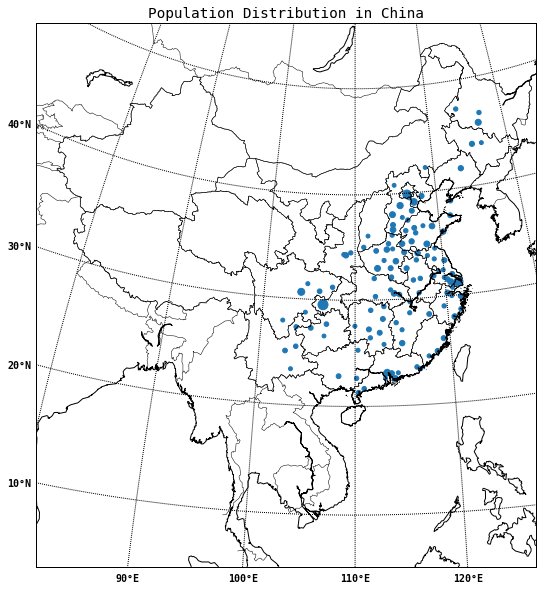

In [79]:

import urllib
import numpy as np
import matplotlib
matplotlib.rcParams['toolbar'] = 'None'
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from  matplotlib.animation import FuncAnimation
import pandas as pd
import seaborn as sns


# posi=pd.read_csv("D:\\Files\\datasets\\CitiesLatLon_China.csv")

posi=pd.read_excel("/opt/Work/ML/python-code-basemap-example/resources/Basemap/2015Cities-CHINA.xlsx")


lat = np.array(posi["lat"][0:120])                        # 获取维度之维度值
lon = np.array(posi["lon"][0:120])                        # 获取经度值
pop = np.array(posi["pop"][0:120],dtype=float)    # 获取人口数，转化为numpy浮点型
gdp = np.array(posi["GDP"][0:120],dtype=float)    # 获取人口数，转化为numpy浮点型

size=(pop/np.max(pop))*100    # 绘制散点图时图形的大小，如果之前pop不转换为浮点型会没有大小不一的效果

# size=(gdp/np.max(gdp))*100    # 绘制散点图时图形的大小，如果之前pop不转换为浮点型会没有大小不一的效果

map = Basemap(projection='stere', 
              lat_0=35, lon_0=110,
              llcrnrlon=82.33, 
              llcrnrlat=3.01, 
              urcrnrlon=138.16, 
              urcrnrlat=53.123,resolution='l',area_thresh=10000,rsphere=6371200.)


map.drawcoastlines()   
map.drawcountries()    
map.drawcounties()
map.readshapefile("/opt/Work/ML/python-code-basemap-example/resources/CHN_adm_shp/CHN_adm1",'states',drawbounds=True)
map.drawmapboundary()


parallels = np.arange(0.,90,10.) 
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10) # 绘制纬线

meridians = np.arange(80.,140.,10.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10) # 绘制经线


x,y = map(lon,lat)

# map.scatter(x,y,edgecolors='r',facecolors='r',marker='*',s=320)

map.scatter(x,y,s=size)

plt.title("Population Distribution in China")
plt.show()

下载地图包

在[https://gadm.org/download_country_v3.html]
上下载中国和台湾的地图包

In [ ]:
wget http://www.stats.gov.cn/tjsj/pcsj/rkpc/6rp/excel/A0101a.xls
wget https://data.biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_TWN_shp.zip
wget https://data.biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_CHN_shp.zip

In [84]:
!unzip -d gadm36_TWN_shp -x ~/Downloads/gadm36_TWN_shp.zip
!unzip -d gadm36_CHN_shp -x ~/Downloads/gadm36_CHN_shp.zip

Archive:  /home/zhou/Downloads/gadm36_TWN_shp.zip
 extracting: gadm36_TWN_shp/gadm36_TWN_0.cpg  
  inflating: gadm36_TWN_shp/gadm36_TWN_0.dbf  
  inflating: gadm36_TWN_shp/gadm36_TWN_0.prj  
  inflating: gadm36_TWN_shp/gadm36_TWN_0.shp  
  inflating: gadm36_TWN_shp/gadm36_TWN_0.shx  
 extracting: gadm36_TWN_shp/gadm36_TWN_1.cpg  
  inflating: gadm36_TWN_shp/gadm36_TWN_1.dbf  
  inflating: gadm36_TWN_shp/gadm36_TWN_1.prj  
  inflating: gadm36_TWN_shp/gadm36_TWN_1.shp  
  inflating: gadm36_TWN_shp/gadm36_TWN_1.shx  
 extracting: gadm36_TWN_shp/gadm36_TWN_2.cpg  
  inflating: gadm36_TWN_shp/gadm36_TWN_2.dbf  
  inflating: gadm36_TWN_shp/gadm36_TWN_2.prj  
  inflating: gadm36_TWN_shp/gadm36_TWN_2.shp  
  inflating: gadm36_TWN_shp/gadm36_TWN_2.shx  
  inflating: gadm36_TWN_shp/license.txt  
Archive:  /home/zhou/Downloads/gadm36_CHN_shp.zip
 extracting: gadm36_CHN_shp/gadm36_CHN_0.cpg  
  inflating: gadm36_CHN_shp/gadm36_CHN_0.dbf  
  inflating: gadm36_CHN_shp/gadm36_CHN_0.prj  
  inflating:

In [86]:
! ls gadm36_CHN_shp

gadm36_CHN_0.cpg  gadm36_CHN_1.dbf  gadm36_CHN_2.prj  gadm36_CHN_3.shp
gadm36_CHN_0.dbf  gadm36_CHN_1.prj  gadm36_CHN_2.shp  gadm36_CHN_3.shx
gadm36_CHN_0.prj  gadm36_CHN_1.shp  gadm36_CHN_2.shx  license.txt
gadm36_CHN_0.shp  gadm36_CHN_1.shx  gadm36_CHN_3.cpg
gadm36_CHN_0.shx  gadm36_CHN_2.cpg  gadm36_CHN_3.dbf
gadm36_CHN_1.cpg  gadm36_CHN_2.dbf  gadm36_CHN_3.prj


In [81]:
import pandas as pd
df = pd.read_excel('A0101a.xls', encoding='utf-8', head=None, skiprows=6)
df.head()

df[['省份', '人口数']]= df[['Unnamed: 0', 'Unnamed: 4']]
df = df['省份'].to_frame().join(df['人口数'])
df = df[1:]
df['省名'] = df['省份'].str.replace(' ', '')
df.set_index('省名', inplace = True)
del df['省份']
df.to_csv('chnpop.csv')

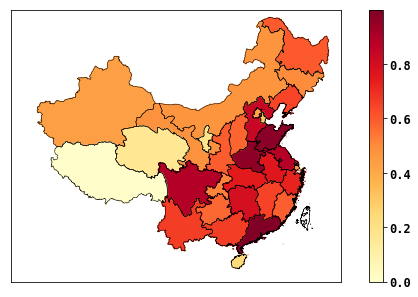

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
from matplotlib.collections import PatchCollection
from matplotlib import pylab

plt.figure(figsize = (10,5))
# m= Basemap(llcrnrlon=73, llcrnrlat=18, urcrnrlon=135, urcrnrlat=55) #指定中国的经纬度
m= Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, \
           projection='lcc', lat_1=33, lat_2=45, lon_0=100) # ‘lcc'将投影方式设置为兰伯特投影
# projection='ortho' 投影方式设置为正投影——类似地球仪

m.readshapefile('gadm36_CHN_shp/gadm36_CHN_1', 'states', drawbounds = True)
#读取数据
df = pd.read_csv('chnpop.csv')
df['省名'] = df.省名.str[:2]
df.set_index('省名', inplace=True)

# 把每个省的数据映射到colormap上
statenames=[]
colors={}
patches = []
cmap = plt.cm.YlOrRd # 国旗色红黄色调
vmax = 10**8
vmin = 3*10**6
# 处理地图包里的省名
for shapedict in m.states_info:
    statename = shapedict['NL_NAME_1']
    p = statename.split('|')
    if len(p) > 1:
        s = p[1]
    else:
        s = p[0]
    s = s[:2]
    if s == '黑龍':
        s = '黑龙'
    statenames.append(s)
    pop = df['人口数'][s]
    colors[s] = cmap(np.sqrt((pop - vmin) / (vmax - vmin)))[:3] #根据归一化后的人口数映射颜色
ax = plt.gca()
for nshape, seg in enumerate(m.states):
    color = rgb2hex(colors[statenames[nshape]])
    poly = Polygon(seg, facecolor=color, edgecolor=color)
    patches.append(poly)
    ax.add_patch(poly)

# 图片绘制加上台湾（台湾不可或缺）
m.readshapefile('gadm36_TWN_shp/gadm36_TWN_1', 'taiwan', drawbounds=True)
for nshape, seg in enumerate(m.taiwan):
    poly = Polygon(seg, facecolor='w')
    patches.append(poly)
    ax.add_patch(poly)
 
# 添加colorbar 渐变色legend
colors1 = [i[1] for i in colors.values()]
colorVotes = plt.cm.YlOrRd
p = PatchCollection(patches, cmap =colorVotes)
p.set_array(np.array(colors1))
pylab.colorbar(p)

#m.drawcoastlines() #绘制海岸线
#m.drawcountries(linewidth=1.5) #绘制国家边界线
plt.show()
